<a href="https://colab.research.google.com/github/Otaboyev0727/OpenCV/blob/main/car_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !importimportimportimport install roboflow
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib inline
from IPython.display import Image

# Faqat nomerni o'zini taniydigan modelni API orqali chaqiryapmiz

In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=965b7eb849ca2f588cabd55abdc2c5159556964bf552e4b2869d91087b65ce29
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ODg3GNZvZRLFHyvQUT3K")
project = rf.workspace().project("car-numbers2")
model = project.version(1).model

# infer on a local image
print(model.predict("/content/mashina1.jpg", confidence=40, overlap=30).json())


loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 362, 'y': 567, 'width': 193, 'height': 43, 'confidence': 0.7145989537239075, 'class': 'number_plate', 'image_path': '/content/mashina1.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '700', 'height': '700'}}


# mashina raqamini konturga oladi

In [ ]:

# visualize your prediction
model.predict("/content/mashina1.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())

# original rasm

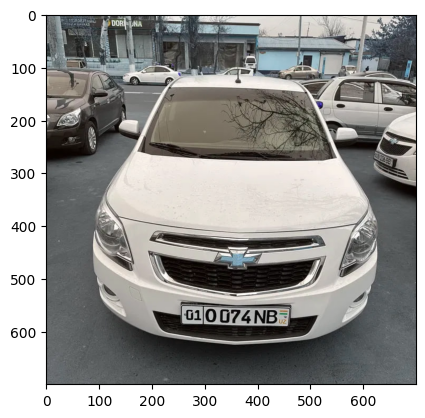

In [ ]:
img1=cv.imread('/content/mashina1.jpg')
plt.imshow(img1)

# nomeri konturga olingan model

In [ ]:
# visualize your prediction
model.predict("/content/mashina1.jpg", confidence=40, overlap=30).save("prediction.jpg")
# infer on an image hosted elsewhere
#print(model.predict("/content/mashina1.jpg", hosted=True, confidence=40, overlap=30).json())

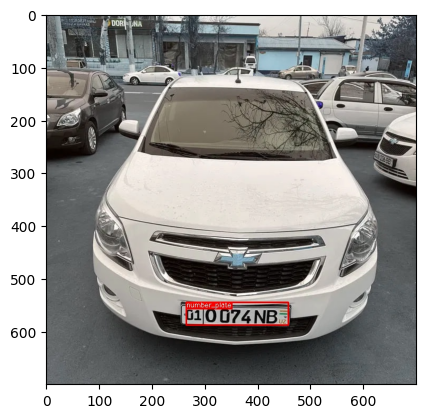

In [ ]:
img1=cv.imread('/content/prediction.jpg')
plt.imshow(img1)

# nomer konturini kesib olamiz

In [ ]:
preds = model.predict("/content/mashina1.jpg", confidence=40, overlap=30).json()

preds

{'predictions': [{'x': 362,
   'y': 567,
   'width': 193,
   'height': 43,
   'confidence': 0.7145989537239075,
   'class': 'number_plate',
   'image_path': '/content/mashina1.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '700', 'height': '700'}}

In [ ]:
# x, y, w, h = preds['predictions']
import pandas as pd
import numpy as np
preds = pd.Series(preds['predictions'][0])

np.array(preds.index[:4])

array(['x', 'y', 'width', 'height'], dtype=object)

In [ ]:
x, y, w, h = tuple(preds[np.array(preds.index[:4])].values)

In [ ]:
x, y, w, h

(362, 567, 193, 43)

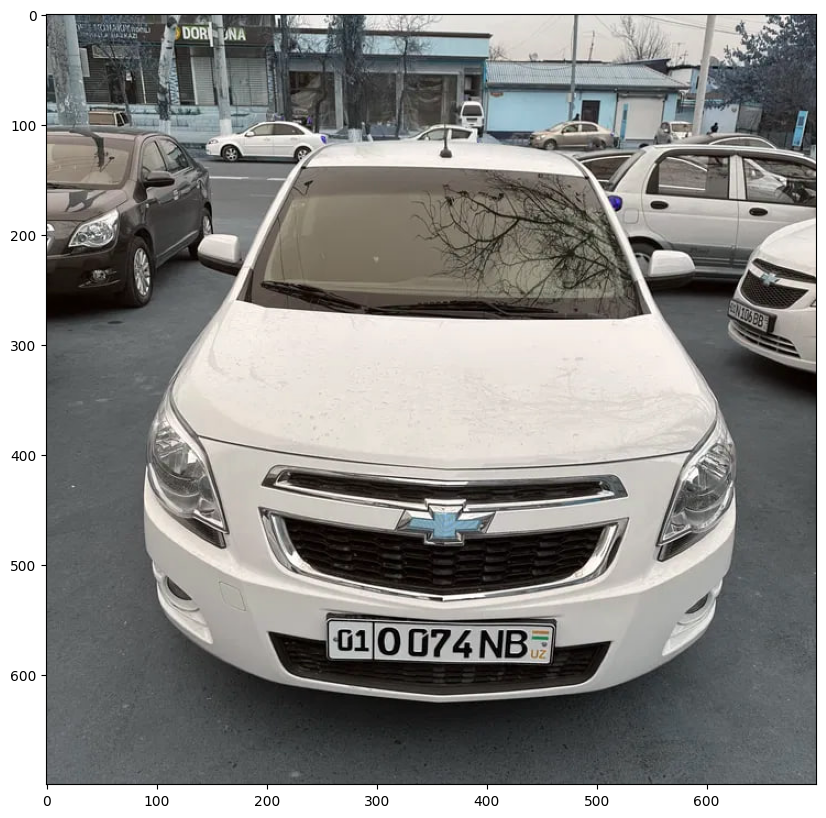

In [ ]:
rasm = cv.imread('/content/mashina1.jpg')

height, width, channel = rasm.shape

plt.figure(figsize=(12, 10))
plt.imshow(rasm, cmap='gray')
plt.axis('on')
plt.savefig('Car.png',bbox_inches = 'tight')
plt.show()

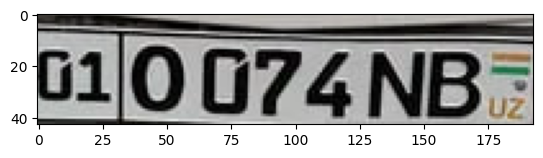

In [ ]:
cropped_region = rasm[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)]
plt.imshow(cropped_region)

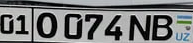

In [ ]:
# Save resized image to disk
cv.imwrite("resized_cropped.png", cropped_region)

# Display the cropped and resized image
Image(filename='resized_cropped.png') 